# Optimization of SVM Model using GridSearchCV on Student Performance Dataset

#### Completed by:
-  Danial Syairiman Razali (2017310241)  
-  Nik Muhammad Naim Bin Nik Ghazali (2017955979)  

Import all the required libraries

In [1]:
import pandas as pd                                                 # Used for importing and manipulating datasets
import numpy as np                                                  # Used for manipulating datasets
from sklearn.svm import SVC                                         # Used for building SVM model for classification problems
from sklearn.model_selection import train_test_split, GridSearchCV  # Used to partition the dataset into training and testing and for parameter tuning (finding the best set of parameter)
from sklearn.preprocessing import LabelEncoder                      # Used for coverting categorical data into numerical 
from sklearn.pipeline import Pipeline                               # Used for building pipeline for encapsulating multiple different transformers and estimator into one object
from sklearn.preprocessing import StandardScaler                    # Used for normalizing the dataset (mean = 0, sd = 1)
from sklearn.metrics import classification_report                   # Used for building a text report (used alongside GridSearchCV)
from collections import defaultdict                                 # Used for creating dictionary
import matplotlib.pyplot as plt                                     # Used for plotting charts
import seaborn as sns                                               # Used for plotting charts

## 1.0 Data Loading

Load the Student Performance Datasets

In [2]:
st_por = pd.read_csv('student-por.csv', delimiter=';')             #Loading data student-por.csv from home to the notebook
st_mat = pd.read_csv('student-mat.csv', delimiter=';')             #Loading data student-math.csv from home to the notebook

# Check the dimension of the data
print("Portuguese score dataset:", st_por.shape)
print("Math score dataset:", st_mat.shape)

# Verify that the data is loaded correctly
st_por.head()                                        #Check the first 5 rows of Portugese score dataset and all the columns

Portuguese score dataset: (649, 33)
Math score dataset: (395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
st_mat.head()                                         #Check the first 5 rows of Math score dataset and all the columns

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## 2.0 Data Pre-Processing

### 2.1 Official Grading System
We will convert the final score for G1, G2 and G3 to a grading system that follows the official Portuguese education system.

In [4]:
# Create three new grade columns - corresponding to G1, G2 and G3, for both datasets
# Portuguese score dataset
st_por['f1_grade'] = 'NaN'                       #create an empty column named f1_grade in portugese dataset
st_por['f2_grade'] = 'NaN'                       #create an empty column named f2_grade in portugese dataset
st_por['final_grade'] = 'NaN'                    #create an empty column named final_grade in portugese dataset

# Math score dataset
st_mat['f1_grade'] = 'NaN'                       #create an empty column named f1_grade in math dataset
st_mat['f2_grade'] = 'NaN'                       #create an empty column named f2_grade in math dataset
st_mat['final_grade'] = 'NaN'                    #create an empty column named final_grade in math dataset

# F: 0-9, E: 10-11, D: 12-13, C: 14-15, B: 16-17, A: 18-20
# Portuguese score dataset
st_por.f1_grade = pd.cut(st_por.G1, bins=(-1, 9, 11, 13, 15, 17, 20), labels = ['F', 'E', 'D', 'C', 'B', 'A']) 
                   #populate the f1_grade column with values derived from G1 column binned based on the cutoff points in the () for portugese dataset
st_por.f2_grade = pd.cut(st_por.G2, bins=(-1, 9, 11, 13, 15, 17, 20), labels = ['F', 'E', 'D', 'C', 'B', 'A'])
                   #populate the f2_grade column with values derived from G2 column binned based on the cutoff points in the () for portugese dataset
st_por.final_grade = pd.cut(st_por.G3, bins=(-1, 9, 11, 13, 15, 17, 20), labels = ['F', 'E', 'D', 'C', 'B', 'A'])
                   #populate the final_grade column with values derived from G3 column binned based on the cutoff points in the () for portugese dataset

# Math score dataset
st_mat.f1_grade = pd.cut(st_mat.G1, bins=(-1, 9, 11, 13, 15, 17, 20), labels = ['F', 'E', 'D', 'C', 'B', 'A'])
                #populate the f1_grade column with values derived from G1 column binned based on the cutoff points in the () for math dataset
st_mat.f2_grade = pd.cut(st_mat.G2, bins=(-1, 9, 11, 13, 15, 17, 20), labels = ['F', 'E', 'D', 'C', 'B', 'A'])
                #populate the f2_grade column with values derived from G2 column binned based on the cutoff points in the () for math dataset
st_mat.final_grade = pd.cut(st_mat.G3, bins=(-1, 9, 11, 13, 15, 17, 20), labels = ['F', 'E', 'D', 'C', 'B', 'A'])
                #populate the final_grade column with values derived from G3 column binned based on the cutoff points in the () for math dataset

## 3.0 Exploratory Data Analysis

Plot the chart for `final_grade`.

Text(0,0.5,'Number of Student')

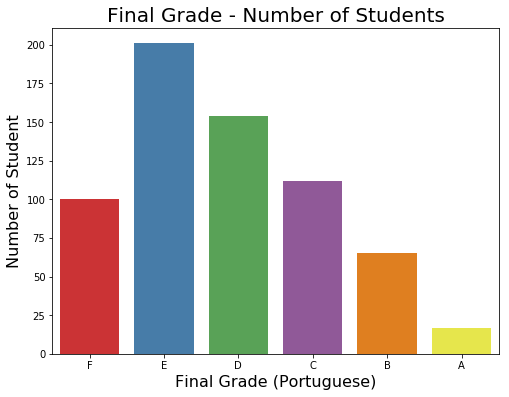

In [5]:
plt.figure(figsize=(8,6))                                                              # Set the size (width and height) of the chart that will be created 
sns.countplot(st_por.final_grade, order=["F","E", "D","C","B","A"], palette = "Set1")  # Create a Bar chart of final_grade and use Set1 color scheme
plt.title('Final Grade - Number of Students', fontsize = 20)                           # Set the main chart title
plt.xlabel('Final Grade (Portuguese)', fontsize=16)                                    # Set the x-axis title
plt.ylabel('Number of Student', fontsize=16)                                           # Set the y-axis title

Text(0,0.5,'Number of Student')

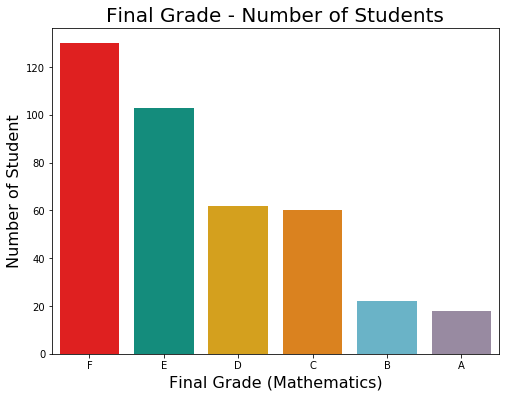

In [6]:
plt.figure(figsize=(8,6))                                                                 #Set the size (width and height) of the chart that will be created 
custom_col = ["#FF0000", "#00A08A", "#F2AD00", "#F98400", "#5BBCD6", "#9986A5"]           #Create a custom color palette
sns.countplot(st_mat.final_grade, order=["F","E", "D","C","B","A"], palette = custom_col) #Create a Bar chart of final_grade and use Set1 color scheme
plt.title('Final Grade - Number of Students', fontsize = 20)                              #Set the main chart title
plt.xlabel('Final Grade (Mathematics)', fontsize=16)                                      #Set the x-axis title
plt.ylabel('Number of Student', fontsize=16)                                              #Set the y-axis title

Text(0.5,1,'Correlation Heatmap')

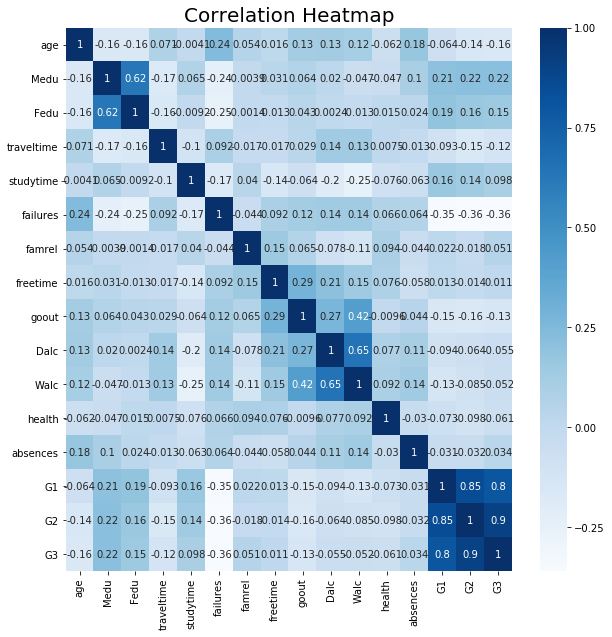

In [7]:
corr = st_mat.corr()                           # Calculate the correlation for each variables (inputs and target)
plt.figure(figsize=(10,10))                    # Set the size (width and height) of the correlation heat map that will be created
sns.heatmap(corr,annot=True, cmap="Blues")     # Genearate the heat map and use the blue gradient color
plt.title('Correlation Heatmap', fontsize=20)  # Set the title of the heatmap chart 

Text(0.5,1,'Correlation Heatmap')

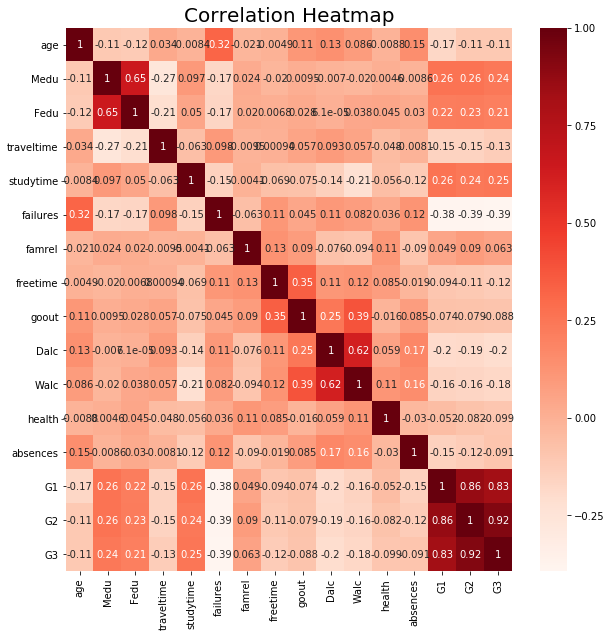

In [8]:
corr = st_por.corr()                               #Calculate the correlation for each variables (inputs and target) for the portugese dataset
plt.figure(figsize=(10,10))                        #Set the size (width and height) of the correlation heat map that will be created
sns.heatmap(corr,annot=True, cmap="Reds")          #Genearate the heat map and use the red gradient color
plt.title('Correlation Heatmap', fontsize=20)      #Set the title of the heatmap chart 

## 4.0 Data Modeling

### 4.1 Data Preparation

#### 4.1.1 Encoding the datasets

In order to make our model works, we have to convert all categorical variables into numerical. We can do this by using `LabelEncoder()`. 

In [9]:
# Separate the categorical and the numerical variable first.
# Portuguese score dataset
st_por_cat = st_por.select_dtypes(include=['object','category'])             # Select only object and category type variables and store it into a new dataframe
st_por_others = st_por.select_dtypes(exclude=['object','category'])          # Select non-object and non-category type variables and store it into a new dataframe

# Math score dataset
st_mat_cat = st_mat.select_dtypes(include=['object','category'])             # Select only object and category type variables and store it into a new dataframe
st_mat_others = st_mat.select_dtypes(exclude=['object','category'])          # Select non-object and non-category type variables and store it into a new dataframe

# Use lambda function to convert all categorical data into numerical data 
d = defaultdict(LabelEncoder)                                                # Retains all the LabelEncoder columns in  a dictionary
fit_por = st_por_cat.apply(lambda x: d[x.name].fit_transform(x))             # Encode all the categorical columns from the Portuguese dataset using the lamda function
fit_mat = st_mat_cat.apply(lambda x: d[x.name].fit_transform(x))             # Encode all the categorical columns from the Mathematics dataset using the lamda function

# The data is then combined 
df_por = pd.concat([fit_por.reset_index(drop=True), st_por_others], axis=1)  # Combine the two dataframes, the encoded categorical variables and the numerical variables back into one dataframe
df_mat = pd.concat([fit_mat.reset_index(drop=True), st_mat_others], axis=1)  # Combine the two dataframes, the encoded categorical variables and the numerical variables back into one dataframe

# Ensure that the dimensions are still the same
print("Portuguese score dataset:",df_por.shape)                              
print("Math score dataset:", df_mat.shape)                                 

Portuguese score dataset: (649, 36)
Math score dataset: (395, 36)


#### 4.1.2 Dropping G1, G2, G3 Score
Now we need to prepare the dataset for modeling. The G1, G2 and G3 score columns will be dropped. In addition, the input variables and the target variable of each dataset will be separated.

In [10]:
# Maintain original copy - this step is actually not required.
dfc_por = df_por.copy()                                            #make copy of the portuguese dataframe
dfc_mat = df_mat.copy()                                            #make a copy of the math dataframe

# Drop G1, G2 and G3 columns
dfc_por = dfc_por.drop(['G1', 'G2', 'G3'], axis=1)                 #drop the columns g1, g2 and g3 for the portuguese dataframe
dfc_mat = dfc_mat.drop(['G1', 'G2', 'G3'], axis=1)                 #drop the columns g1, g2 and g3 for the math dataframe

# Separate into input variables and target variable
Xpor = dfc_por.drop('final_grade', axis=1)                         #create a dataframe Xpor with all the data from portugese dataframe except for final_grade
Ypor = dfc_por.final_grade                                         #create a datafrome Ypor with values from final_grade from portuguese dataframe

Xmat = dfc_mat.drop('final_grade', axis=1)                         #create a dataframe Xmat with all the data from math dataframe except for final_grade
Ymat = dfc_mat.final_grade                                         #create a datafrome Ymat with values from final_grade from math dataframe

#### 4.1.3 Training and Testing Datasets

Create a training and testing dataset using `train_test_split`

In [11]:
# Create training and testing dataset
Xpor_train, Xpor_test, Ypor_train, Ypor_test = train_test_split(Xpor, Ypor, test_size=0.3, random_state=473)  # Create a training dataset (input variables, Xpor_train and target variable, Ypor_train) and testing dataset (input variables, Xpor_test and target variable, Ypor_test)
Xmat_train, Xmat_test, Ymat_train, Ymat_test = train_test_split(Xmat, Ymat, test_size=0.3, random_state=473)  # Create a training dataset (input variables, Xmat_train and target variable, Ymat_train) and testing dataset (input variables, Xmat_test and target variable, Ypor_test)

# Verify it works
Xpor_train.head()  # Check the first 5 rows of the Portuguese training variables 

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
38,0,0,0,0,1,3,1,0,1,1,...,1,3,0,4,3,2,1,1,5,2
202,0,0,1,0,0,1,2,3,1,0,...,1,2,0,3,3,3,1,3,3,10
60,0,0,0,0,1,1,4,2,1,0,...,1,2,0,2,4,4,2,3,4,0
610,1,0,0,0,0,0,0,0,2,0,...,2,2,3,3,5,4,1,4,1,0
47,0,1,1,0,1,1,3,3,1,0,...,1,4,0,4,2,2,1,1,2,2


In [12]:
Xmat_train.head() #Check the first 5 rows of the math training variables 

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,...,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
389,1,0,1,0,1,2,2,0,1,0,...,2,2,1,1,1,1,1,1,5,0
354,1,1,0,0,1,3,2,1,1,0,...,2,2,0,4,5,5,1,3,2,4
181,0,1,1,0,1,3,2,1,1,0,...,1,2,0,4,2,3,1,2,3,2
47,0,1,1,0,1,1,3,3,1,0,...,1,4,0,4,2,2,1,1,2,4
265,0,1,0,1,0,2,2,3,1,0,...,2,2,0,4,2,5,3,4,1,13


## 4.2 Support Vector Machine

First we will run the classification with default parameter and see the accuracy. Then we will carry out parameter tuning to check if we can improve the accuracy.

### 4.2.1 Classification with SVC

Scikit Learn's support vector classification (SVC) model builder has 14 parameters. The code below list out all 14 parameters available for users to play with.

In [13]:
SVC(C=10,                             # Cost of misclassification. The larger the value of C, the higher the cost of misclassification                         
    kernel='poly',                    # Type of hyperplane to be used. Available options: 'rbf' (default); 'poly', 'linear' and 'sigmoid'
    degree=2,                         # Exclusively used when 'poly' is selected
    gamma=0.001,                      # Used to set the decision boundary. The higher the gamma value the higher the curve of the decision boundary
    coef0=1,                          # Used when the input variables are large. Will help to better scale the dataset
    shrinking=False,                  # Will optimize the training time if it is set to True (default)
    probability=True,                 # Will enable the probability score calculation of each observation if set to True. Default is False.
    tol=0.0001,                       # The stopping criterion for SVM
    cache_size=0.01,                  # Memory size for storing data computed by the model. Will affect the computational time if set too high.       
    class_weight=10,                  # Used when the dataset is inbalanced. The parameter will penalize mistakes in sample of class[i] with class_weight[i]
    verbose=False,                    # Show the log of all the things carried out during training the model. Will only work when using console.
    max_iter=-1,                      # Maximum iteration for the model to find the hyperplane. Default is set at -1, which means no limit is set
    decision_function_shape='ovo',    # Selection between 'ovo' and 'ovr' when working on a multi-class classification dataset
    random_state=123                  # Used to set the random number generator to allow for reproducibility
   )

SVC(C=10, cache_size=0.01, class_weight=10, coef0=1,
  decision_function_shape='ovo', degree=2, gamma=0.001, kernel='poly',
  max_iter=-1, probability=True, random_state=123, shrinking=False,
  tol=0.0001, verbose=False)

In [14]:
svc = Pipeline((                                  # Build a pipeline for Math score dataset
    ('scaler',StandardScaler()),                  # Normalized the dataset (mean = 0, sd = 1)
    ('svm_clf', SVC())))                          # Train the model with the default parameter

#### Portuguese Score Dataset

In [15]:
svc.fit(Xpor_train, Ypor_train)    # Fit the model on the training Portugese score dataset

# Obtain the result
print("Training score", ":", svc.score(Xpor_train, Ypor_train), ",", 
     "Testing score", ":", svc.score(Xpor_test, Ypor_test))

Training score : 0.8810572687224669 , Testing score : 0.5743589743589743


#### Math Score Dataset

In [16]:
svc.fit(Xmat_train, Ymat_train)    # Fit the model on the training Math score dataset

# Obtain the result
print("Training score", ":", svc.score(Xmat_train, Ymat_train), ",", 
     "Testing score", ":", svc.score(Xmat_test, Ymat_test))

Training score : 0.894927536231884 , Testing score : 0.5546218487394958


### 4.2.2 Parameter Tuning with GridSearchCV

Scikit Learn's `GridSearchCV` allows for exhaustive search to find the best parameter for our SVM model. We will run parameter tuning for each dataset as each dataset will have different patterns.

#### SVC Parameter Tuning on Portuguese Score Dataset

In [17]:
import warnings
warnings.filterwarnings("ignore")  # Ignore and do not display any warnings from this point forward

print(__doc__)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5], 'C': [1, 10, 100, 1000]},                        # list out the parameters (gamma and C) that we would like to test when using the 'rbf' kernel 
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},                                                  # list out the parameter C that we would like to test when using the 'linear' kernel
                    {'kernel': ['poly'], 'degree': [2, 3, 4], 'C': [1, 10, 100, 1000]},                               # list out the parameters (degree and C) that we would like to test when using the 'poly' kernel
                    {'kernel': ['sigmoid'], 'gamma': [1e-3, 1e-4, 1e-5], 'C': [1, 10, 100, 1000], 'coef0' : [0,1]}]   # list out the parameters (gamma, C and coef0) that we would like to test when using the 'sigmoid' kernel

scores = ['precision', 'recall']  # The classification performance that will be evaluated with this GridSearch

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='%s_macro' % score)  # Build all SVC models using the parameters selected from earlier
    clf.fit(Xpor_train, Ypor_train)                                                # Train the model on the traning datasets

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']                                     # Find the mean score
    stds = clf.cv_results_['std_test_score']                                       # Find the standard deviation score
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):          # Loop over all the models trained. Zip() allows us to access all the variables simultaneously
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Ypor_test, clf.predict(Xpor_test)                             # Use cross-validation to check the average output when running on the testing dataset    
    print(classification_report(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

Grid scores on development set:

0.112 (+/-0.027) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.050 (+/-0.001) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.050 (+/-0.001) for {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.477 (+/-0.067) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.121 (+/-0.020) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.050 (+/-0.001) for {'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}
0.614 (+/-0.128) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.478 (+/-0.149) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.122 (+/-0.020) for {'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}
0.540 (+/-0.107) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.623 (+/-0.130) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.493 (+/-0.097) for {'C': 1000, 'gamma': 1e-05, 'kerne

#### SVC Parameter Tuning on Math Score Dataset

In [18]:
import warnings
warnings.filterwarnings("ignore")    # Ignore and do not display any warnings from this point forward

print(__doc__)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5], 'C': [1, 10, 100, 1000]},                         # list out the parameters (gamma and C) that we would like to test when using the 'rbf' kernel
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]},                                                   # list out the parameter C that we would like to test when using the 'linear' kernel
                    {'kernel': ['poly'], 'degree': [2, 3, 4], 'C': [1, 10, 100, 1000]},                                # list out the parameters (degree and C) that we would like to test when using the 'poly' kernel
                    {'kernel': ['sigmoid'], 'gamma': [1e-3, 1e-4, 1e-5], 'C': [1, 10, 100, 1000], 'coef0' : [0,1]}]    # list out the parameters (gamma, C and coef0) that we would like to test when using the 'sigmoid' kernel

scores = ['precision', 'recall']      # The classification performance that will be evaluated with this GridSearch

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5, scoring='%s_macro' % score)      # Build all SVC models using the parameters selected from earlier
    clf.fit(Xmat_train, Ymat_train)                                                    # Train the model on the traning datasets

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']                                          # Find the mean score
    stds = clf.cv_results_['std_test_score']                                            # Find the standard deviation score
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):               # Loop over all the models trained. Zip() allows us to access all the variables simultaneously
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = Ymat_test, clf.predict(Xmat_test)                                  # Use cross-validation to check the average output when running on the testing dataset
    print(classification_report(y_true, y_pred))
    print()

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.095 (+/-0.043) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.054 (+/-0.002) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.054 (+/-0.002) for {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.554 (+/-0.075) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.129 (+/-0.052) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.054 (+/-0.002) for {'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}
0.609 (+/-0.101) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.525 (+/-0.052) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.127 (+/-0.050) for {'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}
0.572 (+/-0.167) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.565 (+/-0.123) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.526 (+/-0.053) for {'C': 1000, 'gamma': 1e-05, 'kernel'

### 4.2.3 SVC with Optimized Parameters

Build a pipeline using the best parameter obtained from GridSearchCV. Pipeline allows for the same model to be called multiple times.

In [19]:
# SVM for Portugese score dataset
por_svm_clf = Pipeline((                                  # Build a pipeline for Portuguese score dataset
    ('scaler', StandardScaler()),                         # Normalized the dataset (mean = 0, sd = 1)
    ('svm_clf', SVC(kernel='rbf', gamma=0.0001, C=1000))  # Train the model with the parameters shown
))

# SVM for Math score dataset
mat_svm_clf = Pipeline((                                  # Build a pipeline for Math score dataset
    ('scaler', StandardScaler()),                         # Normalized the dataset (mean = 0, sd = 1)
    ('svm_clf', SVC(kernel='rbf', gamma=0.001, C=100))    # Train the model with the parameters shown
))

Run the svm model on Portuguese score dataset

In [20]:
por_svm_clf.fit(Xpor_train, Ypor_train)     # Fit the model on the training Portuguese score dataset

# Obtain the result
print("Training score", ":", por_svm_clf.score(Xpor_train, Ypor_train), ",", 
     "Testing score", ":", por_svm_clf.score(Xpor_test, Ypor_test))

Training score : 0.775330396475771 , Testing score : 0.676923076923077


Run the svm model on Math score dataset

In [21]:
mat_svm_clf.fit(Xmat_train, Ymat_train)      # Fit the model on the training Math score dataset

# Obtain the result
print("Training score", ":", mat_svm_clf.score(Xmat_train, Ymat_train), ",", 
     "Testing score", ":", mat_svm_clf.score(Xmat_test, Ymat_test))

Training score : 0.8876811594202898 , Testing score : 0.6050420168067226


# 5.0 Conclusion

SVM improved with parameter tuning.

For Portuguese score dataset, we see an improvement in the accuracy by 10.3%   
For Math score dataset, we see an improvement in the accuracy by 5.04% 